<a href="https://colab.research.google.com/github/Anamika0606/CSE475_Machine-Learning/blob/main/Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

columns = [
    "class","cap-shape","cap-surface","cap-color","bruises","odor",
    "gill-attachment","gill-spacing","gill-size","gill-color",
    "stalk-shape","stalk-root","stalk-surface-above-ring",
    "stalk-surface-below-ring","stalk-color-above-ring",
    "stalk-color-below-ring","veil-type","veil-color","ring-number",
    "ring-type","spore-print-color","population","habitat"
]

df = pd.read_csv(url, header=None, names=columns)


In [ ]:
print(df.head())
print(df.info())
print(df.shape)


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [ ]:
print(df.isnull().sum())


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


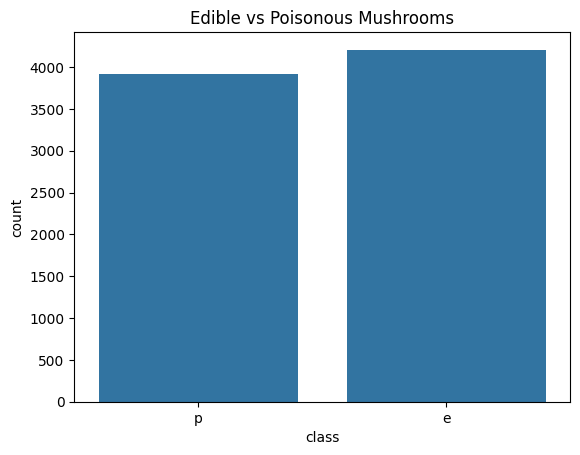

In [ ]:
sns.countplot(x='class', data=df)
plt.title("Edible vs Poisonous Mushrooms")
plt.show()


In [ ]:
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
X = df.drop('class', axis=1)
y = df['class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 1.0


In [ ]:
n_estimators_list = [1, 50, 100, 150, 200, 250]
rf_accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(acc)

    print(f"Random Forest (n_estimators={n}) Accuracy: {acc}")


Random Forest (n_estimators=1) Accuracy: 1.0
Random Forest (n_estimators=50) Accuracy: 1.0
Random Forest (n_estimators=100) Accuracy: 1.0
Random Forest (n_estimators=150) Accuracy: 1.0
Random Forest (n_estimators=200) Accuracy: 1.0
Random Forest (n_estimators=250) Accuracy: 1.0


In [ ]:
results = pd.DataFrame({
    "Model": ["Decision Tree"] + [f"RF ({n})" for n in n_estimators_list],
    "Accuracy": [dt_accuracy] + rf_accuracies
})

print(results)


           Model  Accuracy
0  Decision Tree       1.0
1         RF (1)       1.0
2        RF (50)       1.0
3       RF (100)       1.0
4       RF (150)       1.0
5       RF (200)       1.0
6       RF (250)       1.0


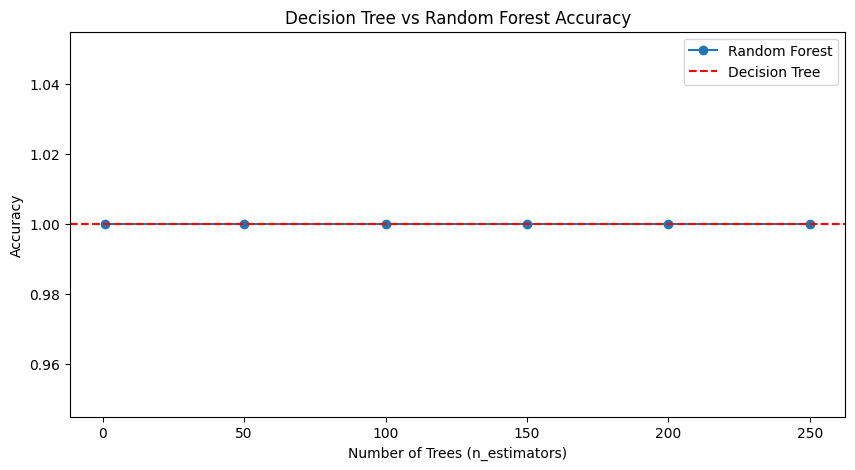

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(n_estimators_list, rf_accuracies, marker='o', label="Random Forest")
plt.axhline(dt_accuracy, color='r', linestyle='--', label="Decision Tree")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Decision Tree vs Random Forest Accuracy")
plt.legend()
plt.show()


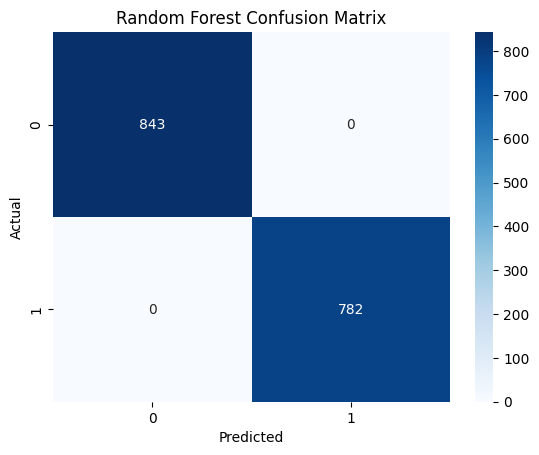

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



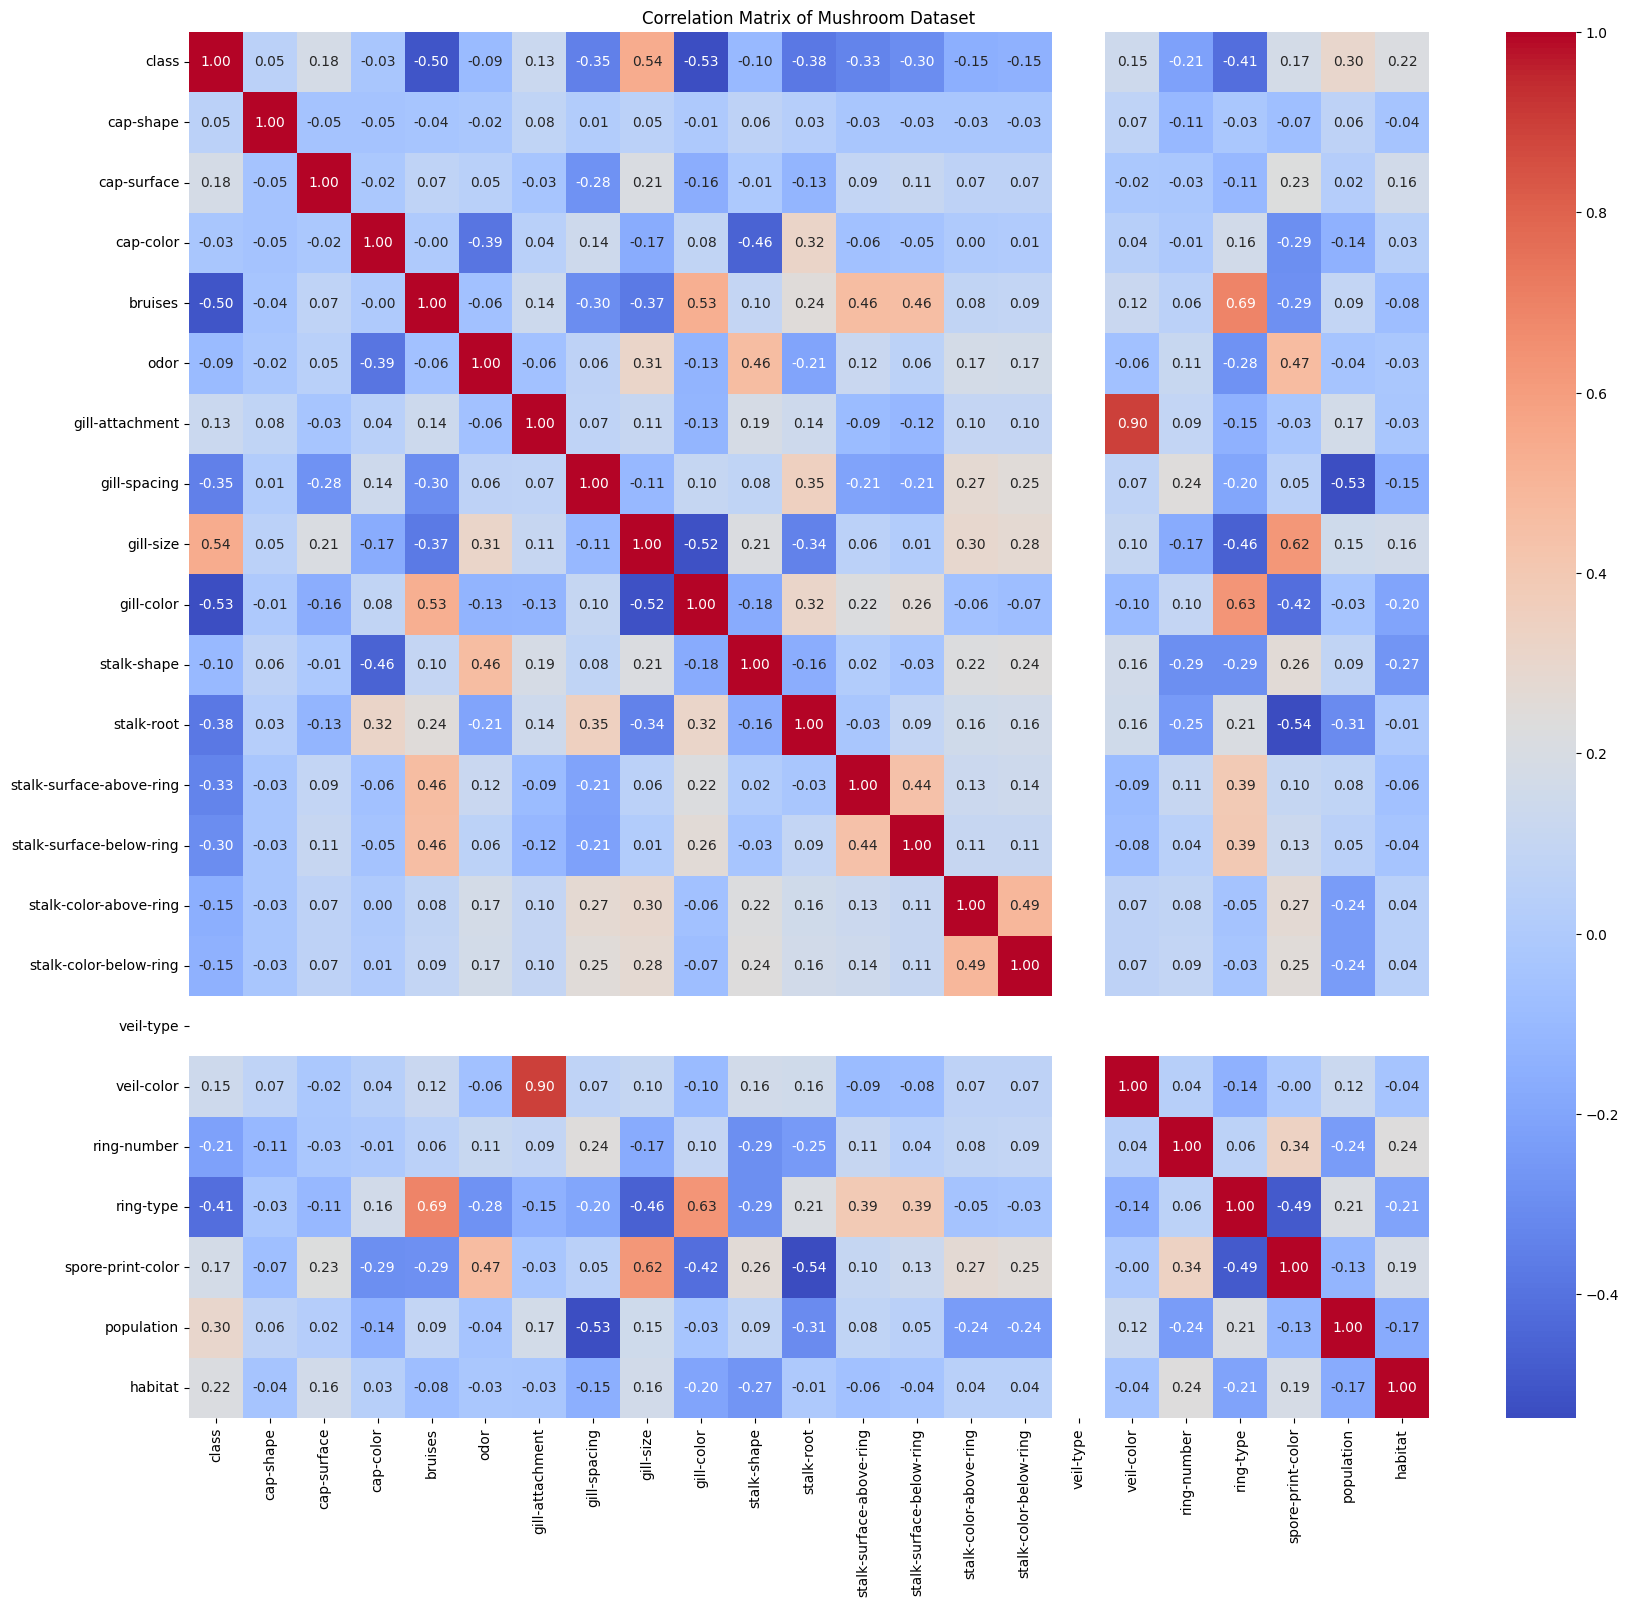

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Define URL and columns for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = [
    "class","cap-shape","cap-surface","cap-color","bruises","odor",
    "gill-attachment","gill-spacing","gill-size","gill-color",
    "stalk-shape","stalk-root","stalk-surface-above-ring",
    "stalk-surface-below-ring","stalk-color-above-ring",
    "stalk-color-below-ring","veil-type","veil-color","ring-number",
    "ring-type","spore-print-color","population","habitat"
]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Encode categorical features into numerical ones
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Generate and display the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Mushroom Dataset')
plt.show()